In [3]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

<function matplotlib.pyplot.show(close=None, block=None)>

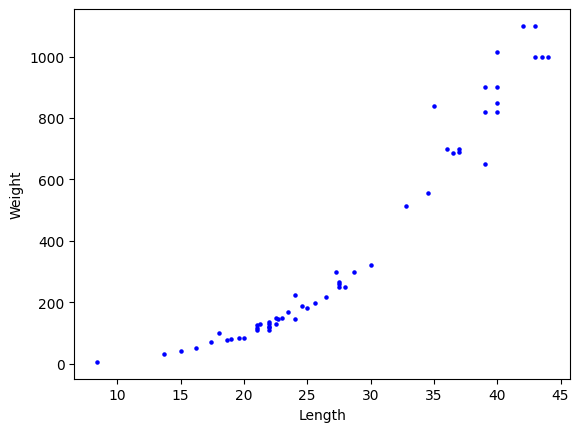

In [4]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight, c='blue', s=5)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show

In [5]:
len(perch_length)
len(perch_weight)
print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, test_size=0.2, random_state=42)
# train_test_split : default => 데이터를 75% 훈련 세트와 25% 테스트 세트로 분할. test_size를 사용하여 비율 조정 가능
# random_state : 무작위성을 제어하는 데 사용되는 시드값, random_state를 설정하면 데이터 분할이 일관되게 유지됨

In [7]:
print(train_input.shape, test_input.shape)

(44,) (12,)


In [22]:
from sklearn.neighbors import KNeighborsRegressor

train_input = train_input.reshape(-1, 1)
train_target = train_target.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)

In [25]:
kn = KNeighborsRegressor()
kn.n_neighbors = 3

kn.fit(train_input, train_target)
#R^2 점수는 모델의 성능을 평가하는 지표로, 1에 가까울수록 모델이 데이터를 잘 설명하고 있음을 의미
train_r2_score = kn.score(train_input, train_target)
test_r2_score = kn.score(test_input, test_target)

print(test_r2_score)
print(train_r2_score)

0.9761346952012298
0.9803764248982696


In [26]:
kn.n_neighbors = 5

kn.fit(train_input, train_target)
train_r2_score = kn.score(train_input, train_target)
test_r2_score = kn.score(test_input, test_target)

print(test_r2_score)
print(train_r2_score)

0.9932626838364674
0.9699886106745992


In [28]:
kn.n_neighbors = 7

kn.fit(train_input, train_target)
train_r2_score = kn.score(train_input, train_target)
test_r2_score = kn.score(test_input, test_target)

print(test_r2_score)
print(train_r2_score)

0.9845352171790438
0.9754453073142916


In [15]:
### Test

In [29]:
study_arr = np.array([1,2,3,4])
print(study_arr.shape)
print("=====================")
print(study_arr.reshape(2,2))
print("=====================")
print(study_arr.reshape(2,2).shape)
print("=====================")
print(study_arr.reshape(-1,1))

(4,)
[[1 2]
 [3 4]]
(2, 2)
[[1]
 [2]
 [3]
 [4]]


In [30]:
test_target[2][0]

np.float64(250.0)

In [18]:
t_input = test_input[2].reshape(-1,1)
p = kn.predict(t_input)[0]
print(f"예측 사용 무게 : {p}")
print(f"실 무게 : {test_target[2]}")

예측 사용 무게 : [255.71428571]
실 무게 : [250.]


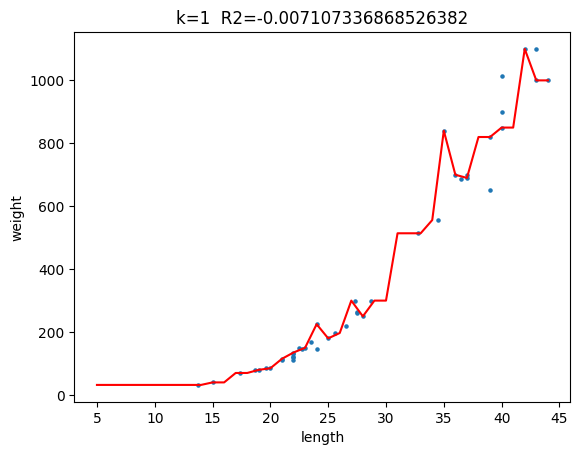

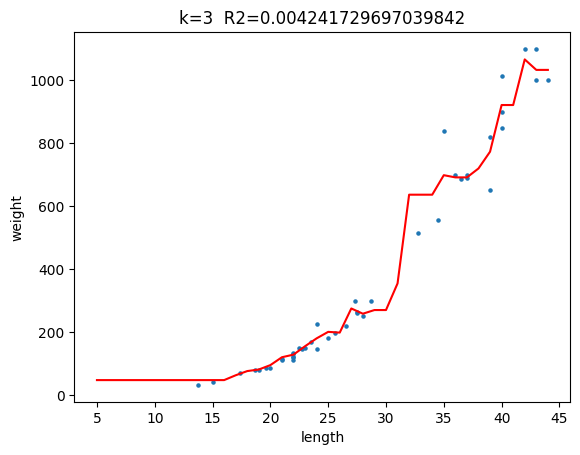

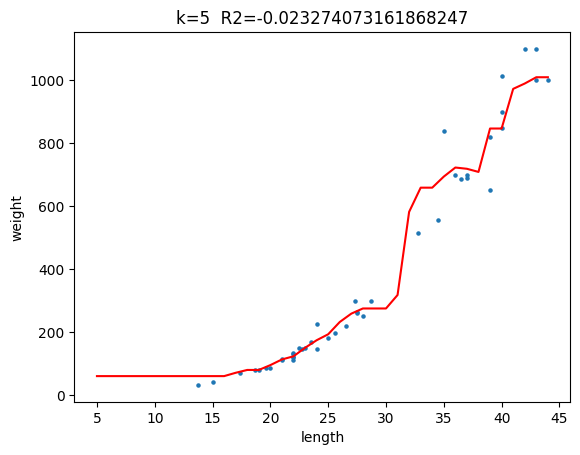

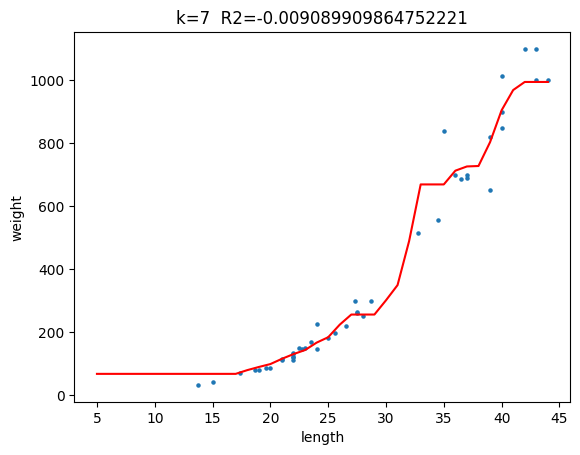

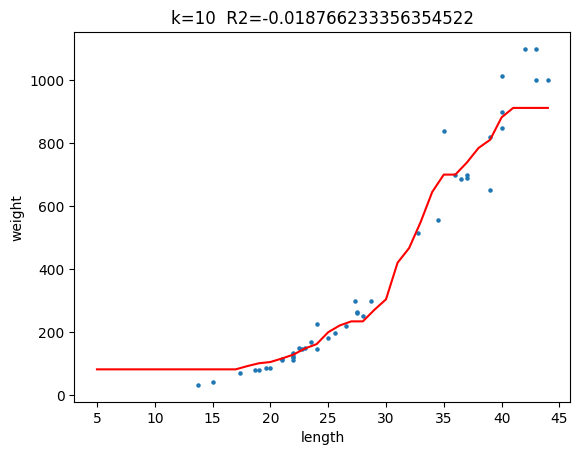

In [19]:
knn = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

for k in [1, 3, 5, 7, 10]:
    knn.n_neighbors = k
    knn.fit(train_input, train_target)
    prediction = knn.predict(x)
    r2_train = knn.score(train_input, train_target)
    r2_test = knn.score(test_input, test_target)

    plt.title(f'k={k}  R2={r2_train - r2_test}')
    plt.scatter(train_input, train_target, s=5)
    plt.plot(x, prediction, c='red')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

In [20]:
knn = KNeighborsRegressor()
knn.n_neighbors = 3
knn.fit(train_input, train_target)

# 우리가 가지고 있는 데이터 이상은 예측할 수 없음
print(knn.predict([[40]]))
print(knn.predict([[41]]))
print(knn.predict([[42]]))
print(knn.predict([[43]]))
print(knn.predict([[45]]))
print(knn.predict([[46]]))
print(knn.predict([[47]]))
print(knn.predict([[48]]))
print(knn.predict([[49]]))
print(knn.predict([[50]]))

[[921.66666667]]
[[921.66666667]]
[[1066.66666667]]
[[1033.33333333]]
[[1033.33333333]]
[[1033.33333333]]
[[1033.33333333]]
[[1033.33333333]]
[[1033.33333333]]
[[1033.33333333]]


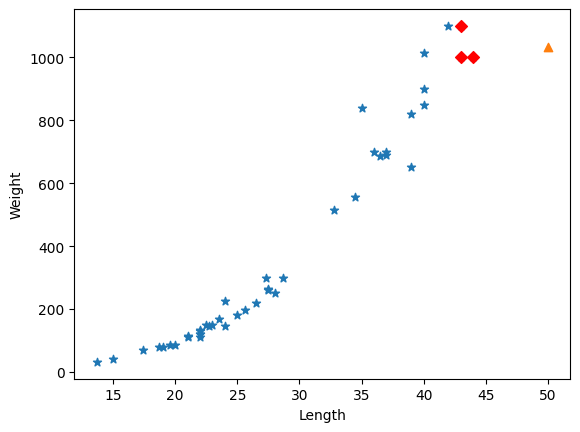

In [21]:
w = 50
d, i = knn.kneighbors([[w]])

plt.scatter(train_input, train_target, marker='*')

plt.scatter(train_input[i], train_target[i], color='red', marker='D')
plt.scatter(w, knn.predict([[w]])[0], marker="^")
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()